#### Importing relevant libraries

In [ ]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

#### Reading the dataset and showing its content

In [7]:
dataset = pd.read_excel("Pistachio_28_Features_Dataset.xlsx")

In [8]:
dataset

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


### Separating the inputs and the targets

In [9]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [10]:
x = x.values
y = y.values

### Deleting an outlier

In [11]:
#x = np.delete(x, 615, axis = 0)
#y = np.delete(y, 615, axis = 0)

In [12]:
x

array([[4.2216300e+05, 2.3789080e+03, 8.3784840e+02, ..., 5.8725500e+01,
        5.4955400e+01, 4.7840000e+01],
       [3.3813600e+05, 2.0851440e+03, 7.2381980e+02, ..., 5.0025900e+01,
        5.2816800e+01, 4.7831500e+01],
       [5.2684300e+05, 2.6473940e+03, 9.4073790e+02, ..., 6.5477200e+01,
        5.9286000e+01, 5.1937800e+01],
       ...,
       [2.5433000e+05, 1.9267360e+03, 7.4749430e+02, ..., 4.4132500e+01,
        4.0798600e+01, 4.0976900e+01],
       [2.3895500e+05, 1.9062679e+03, 7.1664850e+02, ..., 5.1226700e+01,
        4.5716200e+01, 4.5626000e+01],
       [3.4379200e+05, 2.2892720e+03, 8.2384380e+02, ..., 4.7345400e+01,
        3.8696600e+01, 3.9673800e+01]])

### Plotting the first set of features

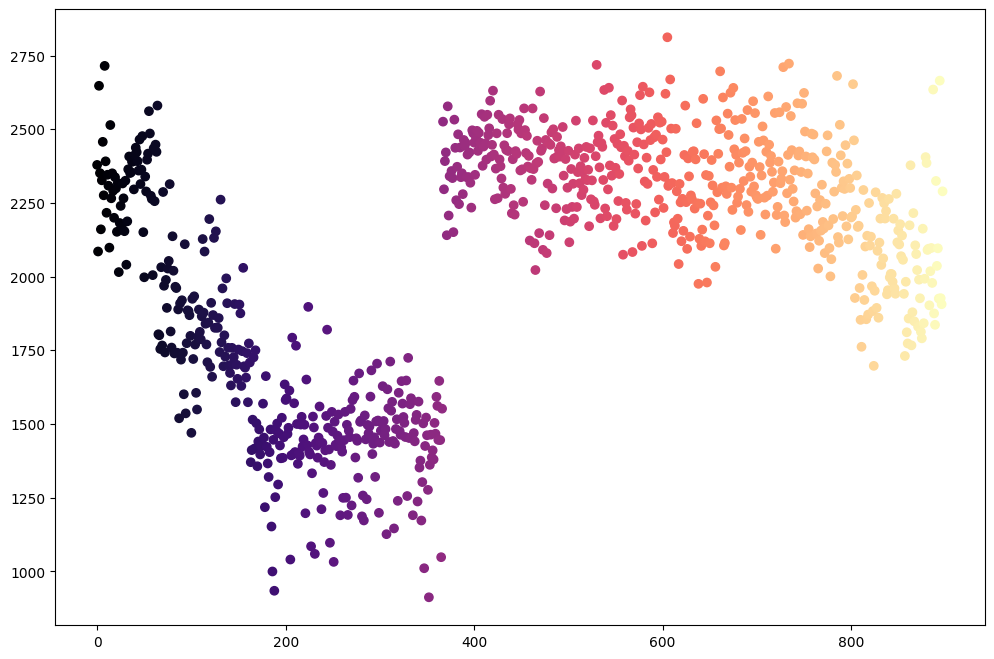

In [13]:
plt.figure(figsize = (12, 8))
plt.scatter(range(len(x[:, 0])), x[:, 1], c = range(len(x)), cmap = 'magma')

#### Creating two methods: one for normalization and the other for feature selection

In [14]:
def normalize(x):
    scaler = MinMaxScaler()
    return scaler.fit_transform(x)

In [15]:
def select_important_features(x, y, n):
    selector = SelectKBest(
        chi2,
        k = n
    )
    selection = selector.fit_transform(x, y)
    return selection

#### Normalizing the inputs

In [16]:
x = normalize(x)

#### Selecting top features

In [17]:
important_features = select_important_features(x, y, 30)

#### Dynamically setting the input size of the neual net based on the feature size

In [18]:
input_size = important_features.shape[1]

#### OneHotEncod'ing the target values

In [19]:
encoder = OneHotEncoder()
encoder.fit(y.reshape(len(y), 1))
y = encoder.transform(y.reshape(len(y), 1))

#### Splitting the data

In [20]:
x_train, x_test, y_train, y_test = train_test_split(important_features, y.toarray(), test_size = 0.2, random_state = 10)

### Initializing the model

In [21]:
model = keras.Sequential()
model.add(Input(shape = input_size))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(7, activation = 'sigmoid'))

#### Compiling the model with adam optimizer

In [26]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.0001), loss = 'binary_crossentropy', metrics = 'accuracy')

### fitting the model to the dataset with a limit of iterations that stops before turning into overfitting

In [27]:
history = model.fit(x_train, y_train, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100
23/23 [==============================] - 1s 9ms/step - loss: 0.6489 - accuracy: 0.8468 - val_loss: 0.5769 - val_accuracy: 0.7778
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4584 - accuracy: 0.7368 - val_loss: 0.4323 - val_accuracy: 0.7611
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.3484 - accuracy: 0.7270 - val_loss: 0.3335 - val_accuracy: 0.7667
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.2711 - accuracy: 0.7409 - val_loss: 0.2601 - val_accuracy: 0.7778
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 0.2190 - accuracy: 0.7604 - val_loss: 0.2120 - val_accuracy: 0.8000
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 0.1896 - accuracy: 0.7716 - val_loss: 0.1853 - val_accuracy: 0.8167
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.1751 - accuracy: 0.7841 - val_loss: 0.1723 - val_accuracy: 0.8278
Epoch 8/100
2

#### Extracting the fitting history data

In [24]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

#### Plotting the accuracy and accuracy validation score along with the loss and loss validation

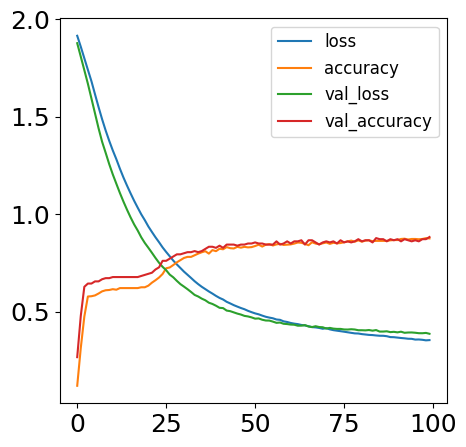

In [25]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(5, 5))
plt.plot(range(len(loss)), loss)
plt.plot(range(len(accuracy)), accuracy)
plt.plot(range(len(val_loss)), val_loss)
plt.plot(range(len(val_accuracy)), val_accuracy)
plt.legend(['loss', 'accuracy', 'val_loss', 'val_accuracy'], fontsize = 12)